# Count Circles

## Description

Count the number of circles in the following image

## Group 11

pg54263 - Tomás Cardoso Francisco

pg53624 - Ana Filipa da Cunha Rebelo

# Passo 1 - Importar as bibliotecas necessárias 

Aqui importamos as bibliotecas usadas na melhoria da imagem, juntamente com o método para a deteção de círculos em dita imagem.

In [ ]:
import cv2
# para instalar cv2, use: pip install opencv-python
import matplotlib.pyplot as plt
import numpy as np

# Passo 2 - Carregar a Imagem de estudo: Circles-noisy.png

Vamos começar por mostrar a nossa imagem de estudo, e tentar determinar o problema principal que impossibilita a deteção dos círculos.

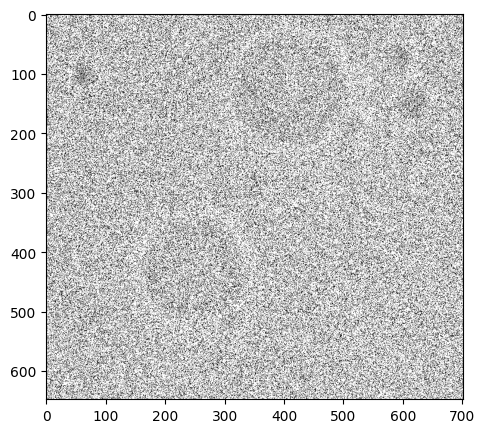

In [2]:
filename = 'Circles-noisy.png'
img = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(15, 5))
plt.imshow(img, cmap='gray')

# Passo 3 - Remover ruído da imagem através do uso de Filtração Espacial

Como dá para ver na imagem acima, a nossa imagem de estudo encontra-se com um problema muito comum na área de Processamento de Imagem: Ruído Sal e Pimenta,
ou ***Salt and Pepper Noise***, como é conhecido em inglês. Este problema ocorre quando a imagem está repleta de pixéis brancos (grãos de sal) e pretos (grãos de
pimenta), espalhados de forma aleatória pela imagem, normalmente causado por fatores como erros de transmissão em canais de comunicação, erros em sensores
de imagem ou outras interferências eletrónicas.

Para tratar deste problema, iremos aplicar uma técnica de **Filtração Espacial** conhecida como ***Median Blur*** de forma a reduzir este ruído. Median Blur é uma técnica focada em filtração espacial de passa-baixa, ou em outras palavras, esta técnica foca em salvaguardar os componentes de baixa frequência de uma imagem, enquanto suprime os componentes de alta frequência, já que estes correspondem a variações de rápida intensidade ou a pequenos detalhes. É uma técnica particularmente adequada para o Ruído Sal e Pimenta, pois o que o filtro faz, é substituir o valor de intensidade de cada píxel com o valor da mediana das intensidades dos píxeis na sua vizinhança.

Com os valores de intensidade extrema introduzidos pelo ruído Sal e Pimenta, a operação mediana do filtro irá descartar os casos atípicos de intensidade, efetivamente removendo o ruído, mas mantendo as características da própria imagem.

**NOTA:** O valor 29 dado como valor do kernel vou utilizado após várias tentativas pelo grupo, onde determinamos que este valor não eliminamos características importantes da imagem com a intensidade do filtro, mas removemos o máximo de ruído possível. 

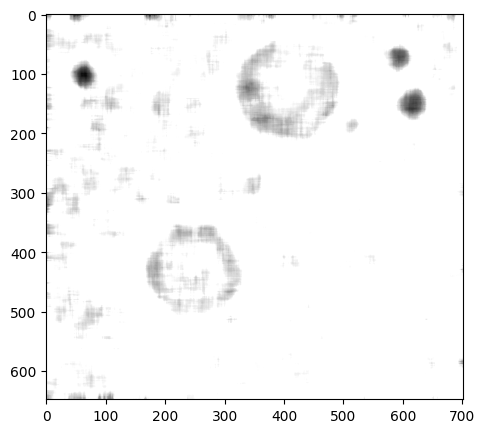

In [3]:
dImg = cv2.medianBlur(img,29)
fig = plt.figure(figsize=(15,5))
plt.imshow(dImg, cmap="gray")

# Passo 4 - Deteção dos círculos através de Segmentação de Imagem

Com uma imagem com menos ruído, começamos agora o processo de detetar os círculos da imagem.

Para tal, vamos utilizar um método de **Segmentação de Imagem**, conhecido como ***Hough Transform***.

Hough Transform é uma técnica usada em processamento de imagens para detetar formas, mais especificamente, linhas e circulos. A versão para detetar círculos foi criada através da versão original das linhas.

A biblioteca **cv2** possui nela um método para a deteção de circulos, chamado de ***HoughCircles***. Este método obtém alguns parâmetros, como, por exemplo, os raios máximo e mínimo para os círculos detetados, ou método de deteção, que neste caso seria **HOUGH_GRADIENT** e retorna uma lista dos círculos como uma representação de tuplos, cada tuplo indicando o centro e o raio de cada circulo na imagem.

Com esta lista, vamos criar uma cópia da imagem melhorada, onde iremos usar a função ***circle*** de biblioteca **cv2** para desenhar os círculos detetados pelo programa nessa cópia. Por cada círculo desenhado, aumentamos o contador de círculos implementado (variável **num_circulos**) por um, e depois, imprimimos o número total encontrado.

Circulos encontrados: 6


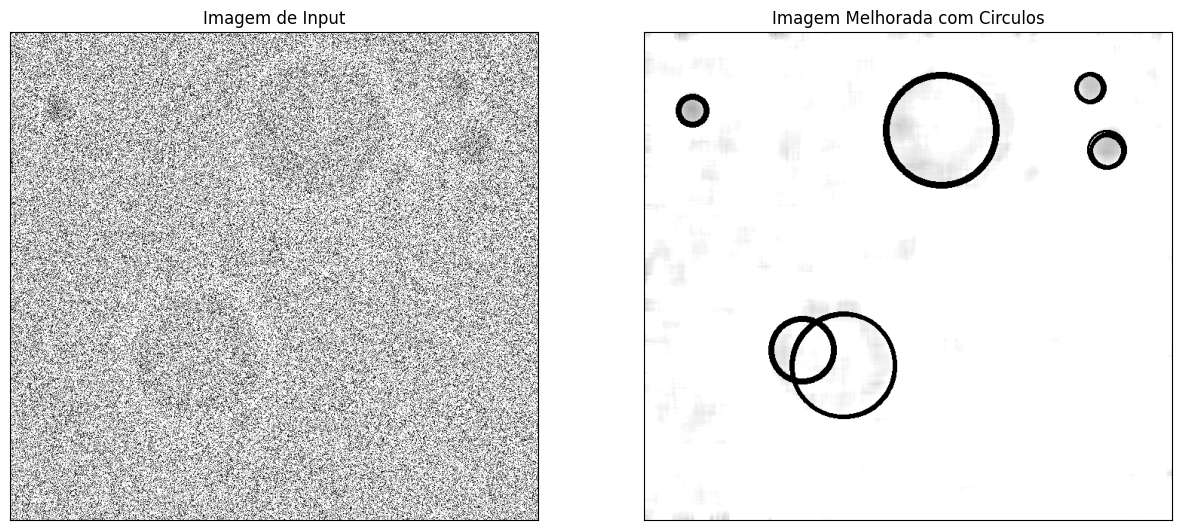

In [7]:
circulos = cv2.HoughCircles(
    dImg,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=50,
    param1=50,
    param2=30,
    minRadius=10,
    maxRadius=100
)

if circulos is not None:
    circulos = np.uint16(np.around(circulos))

num_circulos = 0
for i in circulos[0,:]:
    cv2.circle(dImg, (i[0], i[1]), i[2], (0, 255, 0), 2)
    num_circulos += 1

fig = plt.figure(figsize=(15,23))
plt.subplot(321),plt.imshow(img, cmap='gray')
plt.title('Imagem de Input'), plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(dImg, cmap='gray')
plt.title('Imagem Melhorada com Circulos'), plt.xticks([]), plt.yticks([])

print("Circulos encontrados: " + str(num_circulos))